![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [ ]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [ ]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

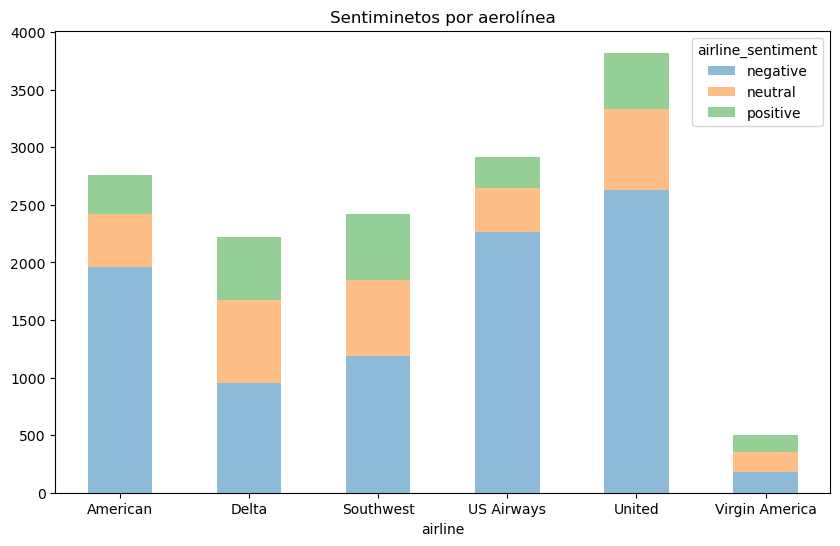

In [ ]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

[nltk_data] Downloading package wordnet to C:\Users\Paula
[nltk_data]     Andrea\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1
##Ajuste de datos de entrenamiento con funcion CountVectorizer
vect_A = CountVectorizer()
X_dtm_A = vect_A.fit_transform(X_train)

##Transformación de datos test
test_X = vect_A.transform(X_test)

#Entrenamiento Modelo de Random Forest
clf_RF = RandomForestClassifier(random_state=0)
clf_RF.fit(X_dtm_A, y_train)

#Evaluación Modelo
y_pred_RF= clf_RF.predict(test_X)

# métricas de desempeño
accuracy = accuracy_score(y_test, y_pred_RF)

print('Desempeño del modelo:')
print(f"Accuracy o exactitud = {accuracy:.4f}")

Desempeño del modelo:
Accuracy o exactitud = 0.7738


Text(158.22222222222223, 0.5, 'Clases Verdaderas')

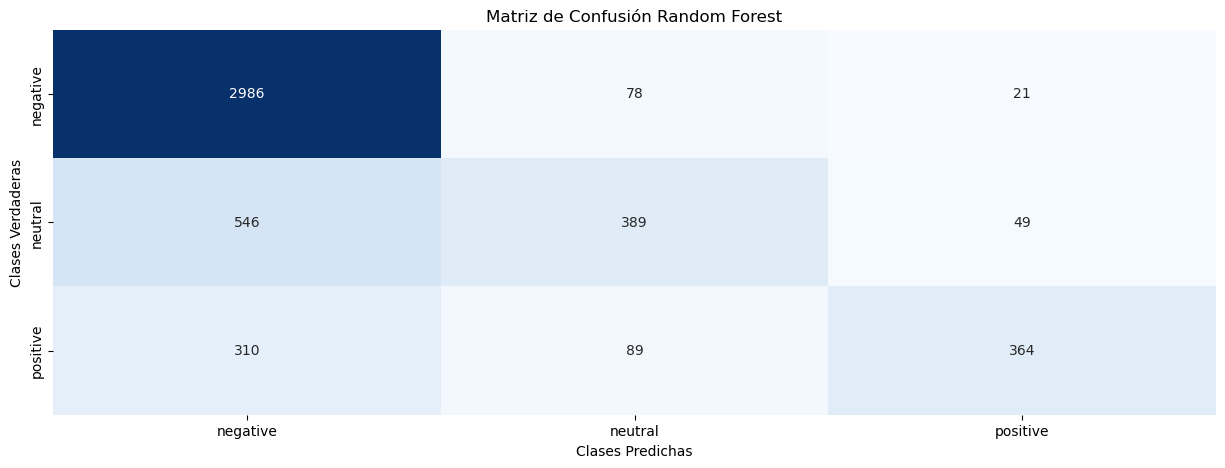

In [ ]:
# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_RF)
clases_nombres = ['negative', 'neutral', 'positive']
plt.figure(figsize=(15, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=clases_nombres, yticklabels=clases_nombres)
plt.title("Matriz de Confusión Random Forest")
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Verdaderas")

**Análisis**

---
El modelo tiene un accuracy o exactitud del 77.4%, es decir que, se clasificaron correctamente el 77.4% de todos los valores, tanto positivos como negativos (verdaderos positivos y verdaderos negativos).

De acuerdo con los datos obtenidos de la matriz de confusión, se puede decir que:
1. La primera fila muestra los valores de la clase 'negative'. De los 3085 datos en esta clase, el modelo predijo correctamente 2986 de ellos, sin embargo, clasificó incorrectamente 78 como clase 'neutral' y 21 como clase 'positive'.
2. La segunda fila muestra los valores de la clase 'neutral'. De los 984 valores, el modelo predijo correctamente 389 de ellos, pero clasificó incorrectamente 546 de ellos como pertenecientes a la clase 'negative' y 49 como pertenecientes a la clase 'positive'.
3. La tercera fila muestra los valores de la clase 'positive'. De los 763 datos de esta clase, clasificó correctamente 364 de ellos, pero clasificó incorrectamente 310 de ellos como pertenecientes a la clase 'negative' y 89 como pertenecientes a la clase 'neutral'.


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2
##Ajuste de datos de entrenamiento con funcion CountVectorizer
vect_B = CountVectorizer(stop_words='english')
X_dtm_B = vect_B.fit_transform(X_train)

##Transformación de datos test
test_X = vect_B.transform(X_test)

#Entrenamiento Modelo de Random Forest
clf_RF_B = RandomForestClassifier(random_state=0)
clf_RF_B.fit(X_dtm_B, y_train)

#Evaluación Modelo
y_pred_RF_B= clf_RF_B.predict(test_X)

# métricas de desempeño
accuracy_B = accuracy_score(y_test, y_pred_RF_B)
print('Desempeño del modelo:')
print(f"Accuracy o exactitud = {accuracy_B:.4f}")

Desempeño del modelo:
Accuracy o exactitud = 0.7618


Text(158.22222222222223, 0.5, 'Clases Verdaderas')

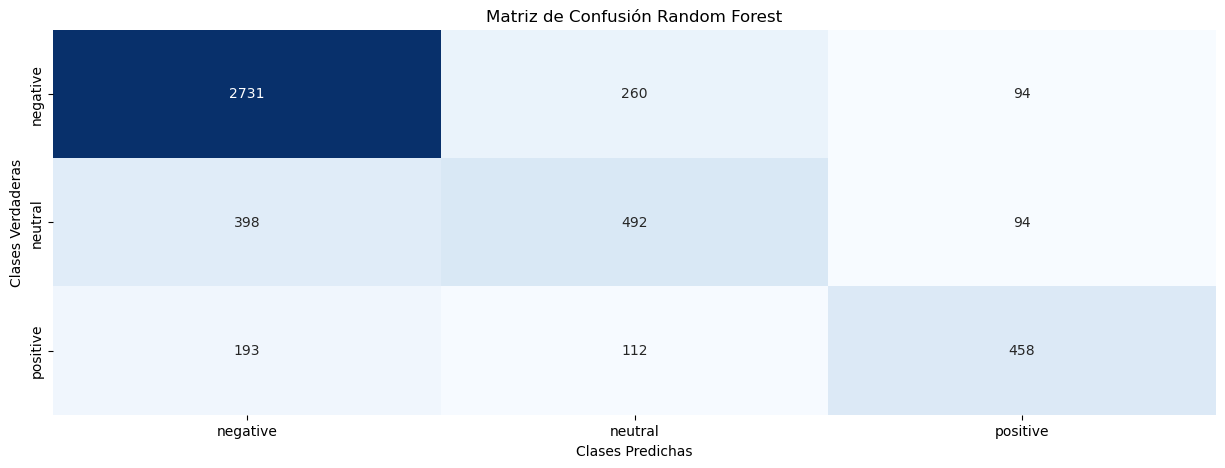

In [ ]:
# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_RF_B)
clases_nombres = ['negative', 'neutral', 'positive']
plt.figure(figsize=(15, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=clases_nombres, yticklabels=clases_nombres)
plt.title("Matriz de Confusión Random Forest")
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Verdaderas")

**Análisis**

---
El modelo tiene un accuracy o exactitud del 76.2%, es decir que, se clasificaron correctamente el 76.2% de todos los valores, tanto positivos como negativos (verdaderos positivos y verdaderos negativos).

De acuerdo con los datos obtenidos de la matriz de confusión, se puede decir que:
1. La primera fila muestra los valores de la clase 'negative'. De los 3085 datos en esta clase, el modelo predijo correctamente 2731 de ellos, sin embargo, clasificó incorrectamente 260 como clase 'neutral' y 94 como clase 'positive'.
2. La segunda fila muestra los valores de la clase 'neutral'. De los 984 valores, el modelo predijo correctamente 492 de ellos, pero clasificó incorrectamente 398 de ellos como pertenecientes a la clase 'negative' y 94 como pertenecientes a la clase 'positive'.
3. La tercera fila muestra los valores de la clase 'positive'. De los 763 datos de esta clase, clasificó correctamente 458 de ellos, pero clasificó incorrectamente 193 de ellos como pertenecientes a la clase 'negative' y 112 como pertenecientes a la clase 'neutral'.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 3
wordnet_lemmatizer = WordNetLemmatizer()
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word,pos='v') for word in words]

##Ajuste de datos de entrenamiento con funcion CountVectorizer
vect_C = CountVectorizer(analyzer=split_into_lemmas)
X_dtm_C = vect_C.fit_transform(X_train)

##Transformación de datos test
test_X = vect_C.transform(X_test)

#Entrenamiento Modelo de Random Forest
clf_RF_C = RandomForestClassifier(random_state=0)
clf_RF_C.fit(X_dtm_C, y_train)

#Evaluación Modelo
y_pred_RF_C= clf_RF_C.predict(test_X)

# métricas de desempeño
accuracy_C = accuracy_score(y_test, y_pred_RF_C)
print('Desempeño del modelo:')
print(f"Accuracy o exactitud = {accuracy_C:.4f}")

Desempeño del modelo:
Accuracy o exactitud = 0.7599


Text(158.22222222222223, 0.5, 'Clases Verdaderas')

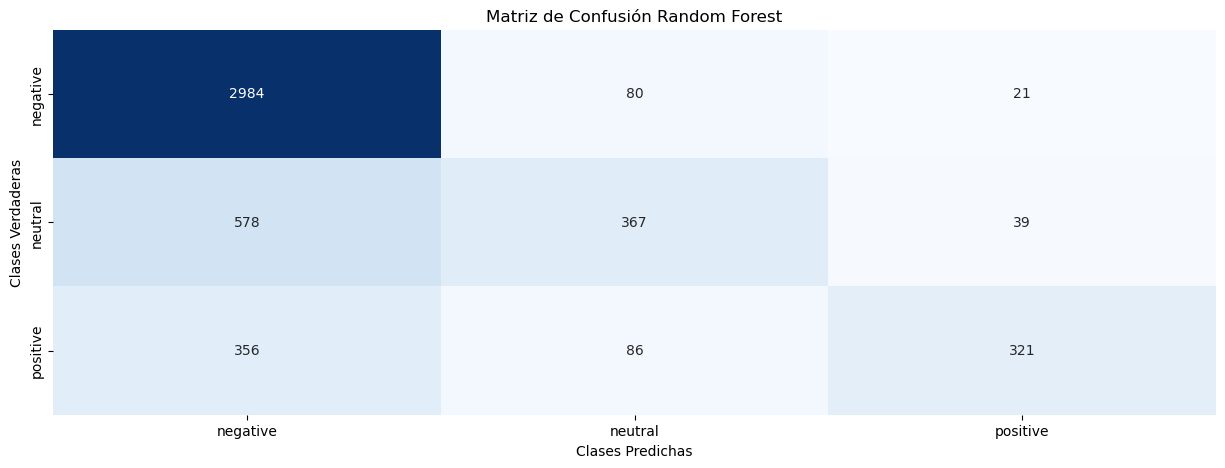

In [ ]:
# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_RF_C)
clases_nombres = ['negative', 'neutral', 'positive']
plt.figure(figsize=(15, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=clases_nombres, yticklabels=clases_nombres)
plt.title("Matriz de Confusión Random Forest")
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Verdaderas")

**Análisis**

---
El modelo tiene un accuracy o exactitud del 76.0%, es decir que, se clasificaron correctamente el 76.0% de todos los valores, tanto positivos como negativos (verdaderos positivos y verdaderos negativos).

De acuerdo con los datos obtenidos de la matriz de confusión, se puede decir que:
1. La primera fila muestra los valores de la clase 'negative'. De los 3085 datos en esta clase, el modelo predijo correctamente 2984 de ellos, sin embargo, clasificó incorrectamente 80 como clase 'neutral' y 21 como clase 'positive'.
2. La segunda fila muestra los valores de la clase 'neutral'. De los 984 valores, el modelo predijo correctamente 367 de ellos, pero clasificó incorrectamente 578 de ellos como pertenecientes a la clase 'negative' y 39 como pertenecientes a la clase 'positive'.
3. La tercera fila muestra los valores de la clase 'positive'. De los 763 datos de esta clase, clasificó correctamente 321 de ellos, pero clasificó incorrectamente 356 de ellos como pertenecientes a la clase 'negative' y 86 como pertenecientes a la clase 'neutral'.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
vect_D = CountVectorizer(stop_words='english', analyzer=split_into_lemmas)
X_dtm_D = vect_D.fit_transform(X_train)

##Transformación de datos test
test_X = vect_D.transform(X_test)

#Entrenamiento Modelo de Random Forest
clf_RF_D = RandomForestClassifier(random_state=0)
clf_RF_D.fit(X_dtm_D, y_train)

#Evaluación Modelo
y_pred_RF_D= clf_RF_D.predict(test_X)

# métricas de desempeño
accuracy_D = accuracy_score(y_test, y_pred_RF_D)
print('Desempeño del modelo:')
print(f"Accuracy o exactitud = {accuracy_D:.4f}")

Desempeño del modelo:
Accuracy o exactitud = 0.7599


Text(158.22222222222223, 0.5, 'Clases Verdaderas')

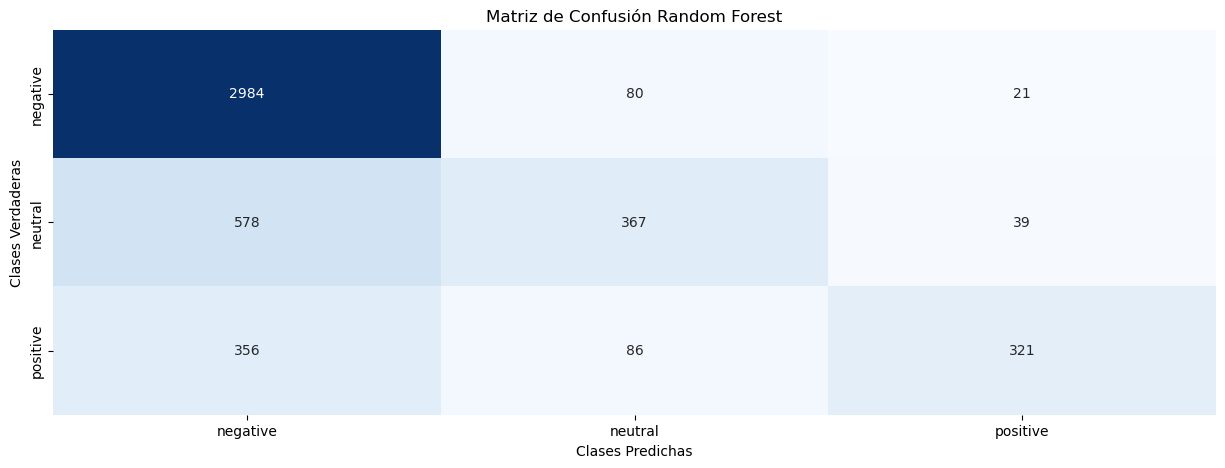

In [ ]:
# Visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_RF_D)
clases_nombres = ['negative', 'neutral', 'positive']
plt.figure(figsize=(15, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=clases_nombres, yticklabels=clases_nombres)
plt.title("Matriz de Confusión Random Forest")
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Verdaderas")

**Análisis**

---
El modelo tiene un accuracy o exactitud del 76.0%, es decir que, se clasificaron correctamente el 76.0% de todos los valores, tanto positivos como negativos (verdaderos positivos y verdaderos negativos).

De acuerdo con los datos obtenidos de la matriz de confusión, se puede decir que:
1. La primera fila muestra los valores de la clase 'negative'. De los 3085 datos en esta clase, el modelo predijo correctamente 2984 de ellos, sin embargo, clasificó incorrectamente 80 como clase 'neutral' y 21 como clase 'positive'.
2. La segunda fila muestra los valores de la clase 'neutral'. De los 984 valores, el modelo predijo correctamente 367 de ellos, pero clasificó incorrectamente 578 de ellos como pertenecientes a la clase 'negative' y 39 como pertenecientes a la clase 'positive'.
3. La tercera fila muestra los valores de la clase 'positive'. De los 763 datos de esta clase, clasificó correctamente 321 de ellos, pero clasificó incorrectamente 356 de ellos como pertenecientes a la clase 'negative' y 86 como pertenecientes a la clase 'neutral'.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

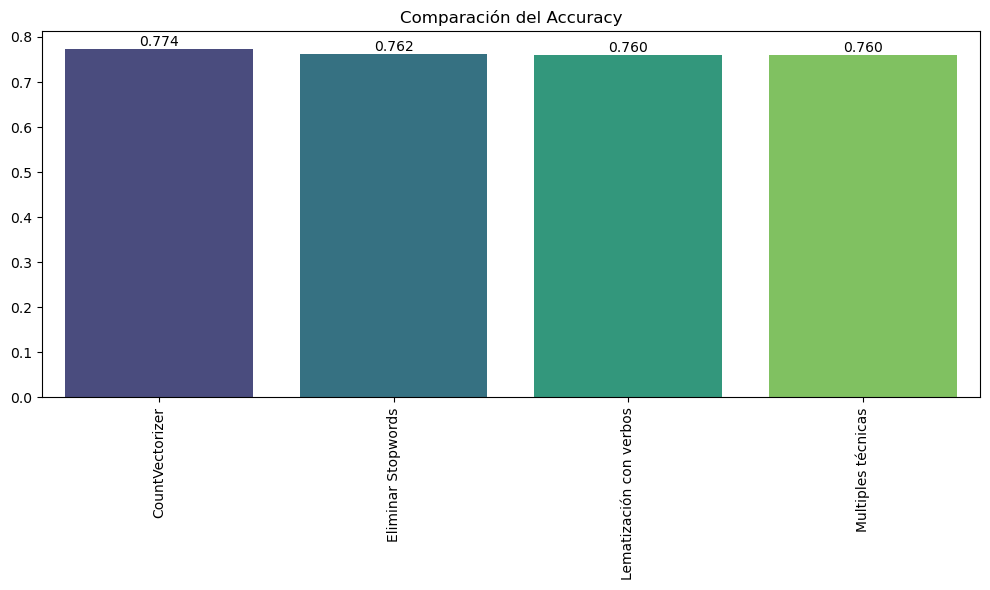

In [ ]:
# Celda 5
def add_labels(plots):
    for bar in plots.patches:
      plots.annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

ejex = ['CountVectorizer', 'Eliminar Stopwords', 'Lematización con verbos', 'Multiples técnicas']
ejey= [accuracy, accuracy_B, accuracy_C, accuracy_D]

df = pd.DataFrame(ejex, ejey)
plt.figure(figsize=(10, 6))
plots = sns.barplot(x=ejex, y= ejey, data=df, palette="viridis")
add_labels(plots)
plt.title(f'Comparación del Accuracy')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Análisis**

---

Si bien el desempeño de los cuatro modelos evaluados fue similar, según los resultados obtenidos el mejor modelo es el de Random Forest con la libreria sklearn empleando la función CountVectorizer sin eliminación de stopwords, ya que presenta una accuracy más alto (0,77).

**Ventajas modelo CountVectorizer:**
* Mantener las stopwords ayuda a conservar un poco más el contexto de las palabras y a identificar las características de los textos.
* Permite opciones de tokenización flexibles.
* Proporciona una representación sencilla de los datos del texto, lo que facilita su interpretación.


Por otro lado, los modelos que obtuvieron el desempeño más bajos fueron aquellos en los que se empleó lematización tanto con verbos como en la mezcla de multiples técnicas.

**Desvetajas modelos de lematización con verbos y múltiples técnicas**
* La lematización tiene un procesamiento lingüistico más complejo, por lo cual se requiere una mayor capacidad computacional y tiempo de ejecución.
* Durante el proceso de lematización las palabras se reducen a su forma base, por lo que es posible que este proceso genere pérdida del contexto del texto que se está analizando y puede impactar negativamente en la precisión de la clasificación.